# Cleaning Datasets for Image Classification with fastdup and Renumics Spotlight
This notebook aims at providing a blueprint on how you can **improve your machine learning data** in no time with fastdup and Renumics Spotlight. *fastdup* is an open source library scalable data curation, offering high-quality detection algorithms for uncovering the most common data problems. *Renumics Spotlight* is an open source tool for interactively visualizing datasets and machine learning results. Combined they can be a powerful way to automatically detect data issues and discover systematic patterns in the detection results. They will help you improve your data in a quick and effective manner!

In [25]:
!pip install -U numpy pandas fastdup renumics-spotlight

  Using cached renumics_spotlight-1.3.0-py3-none-any.whl (2.5 MB)
  Using cached sliceguard-0.0.22-py3-none-any.whl (24 kB)
  Using cached hnne-0.1.9-py3-none-any.whl
  Using cached dash-2.13.0-py3-none-any.whl (10.4 MB)
  Using cached fairlearn-0.9.0-py3-none-any.whl (231 kB)
  Using cached plotly-5.16.1-py2.py3-none-any.whl (15.6 MB)
  Using cached datasets-2.14.4-py3-none-any.whl (519 kB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Using cached transformers-4.32.1-py3-none-any.whl (7.5 MB)
  Using cached FLAML-2.0.1-py3-none-any.whl (295 kB)
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached torchaudio-2.0.2-cp310-cp310-manylinux1_x86_64.whl (4.4 MB)
  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)
INFO: pip is looking at multiple versions of sliceguard[all] to determine which version is compatible with other requirements. This could take a while.
  Using cached sliceguard-0.0.21-py3-none-any.whl (24 kB)


In [1]:
# The imports you need for running this example notebook
from pathlib import Path
import pandas as pd
import numpy as np
import fastdup
from renumics import spotlight
from renumics.spotlight.analysis import DataIssue

/usr/bin/dpkg


In [2]:
# The dataset input directory
INPUT_DIR = Path("/home/daniel/data/license_plates")

In [3]:
# Load the data
train_df = pd.read_csv(INPUT_DIR / "train.csv")
train_df["split"] = "train"
test_df = pd.read_csv(INPUT_DIR / "test.csv")
test_df["split"] = "test"
df = pd.concat((train_df, test_df)).reset_index(drop=True)
df = df.rename(columns={"Image": "filename", "Label": "label"})
df["filename"] = df.apply(lambda row: str(INPUT_DIR / "data" / row["label"] /row["filename"]), axis=1)

In [4]:
df

label                                                               filename  split
0         Oklahoma      /home/daniel/data/license_plates/data/Oklahoma/3bee0f9774d98e.jpg  train
1         Maryland      /home/daniel/data/license_plates/data/Maryland/c721fc8835807c.jpg  train
2           Nevada        /home/daniel/data/license_plates/data/Nevada/bb8fe304434127.jpg  train
3          Wyoming       /home/daniel/data/license_plates/data/Wyoming/8242a974d5e154.jpg  train
4          Wyoming       /home/daniel/data/license_plates/data/Wyoming/66a962c5a3605c.jpg  train
...            ...                                                                    ...    ...
4458          Utah          /home/daniel/data/license_plates/data/Utah/b13e4ec47aa127.jpg   test
4459  WashingtonDC  /home/daniel/data/license_plates/data/WashingtonDC/8a9342d9b114b8.jpg   test
4460       Vermont       /home/daniel/data/license_plates/data/Vermont/d313026cffe30c.jpg   test
4461       NewYork       /home/daniel/data/license_plates/data/NewYork/9b702e5aca6c97.jpg   test
4462        Nevada        /home/daniel/data/license_plates/data/Nevada/5b5c426e3c498e.jpg   test

[4463 rows x 3 columns]

In [5]:
fd = fastdup.create(input_dir =INPUT_DIR / "data")
fd.run(annotations=df, overwrite=True) # Detect data issues using fastdup
_, embeddings = fd.embeddings() # Save the generated embedding to variable

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-08-31 09:55:16 [INFO] Going to loop over dir /tmp/tmp0h4wtiye.csv
2023-08-31 09:55:16 [INFO] Found total 4463 images to run on, 4463 train, 0 test, name list 4463, counter 4463 
2023-08-31 09:55:26 [INFO] Found total 4463 images to run ontimated: 0 Minutes
Finished histogram 0.891
Finished bucket sort 0.909
2023-08-31 09:55:26 [INFO] 67) Finished write_index() NN model
2023-08-31 09:55:26 [INFO] Stored nn model index file work_dir/nnf.index
2023-08-31 09:55:27 [INFO] Total time took 10959 ms
2023-08-31 09:55:27 [INFO] Found a total of 14 fully identical images (d>0.990), which are 0.16 %
2023-08-31 09:55:27 [INFO] Found a total of 50 nearly identical images(d>0.980), which are 0.56 %
2023-08-31 09:55:27 [INFO] Found a total of 6399 above threshold images (d>0.900), which are 71.69 %
2023-08-31 09:55:27 [INFO] Found a total of 446 outlier images         (d<0.050), which are 5.00 %
2023-08-31 09:55:27 [INFO] 

# Check the data for outliers

## Detect issues fast using fastdup

100%|█████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 29495.81it/s]


Stored outliers visual view in  work_dir/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



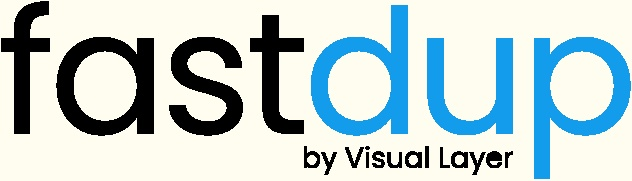
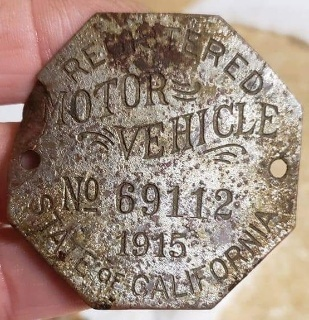
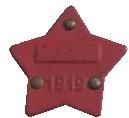
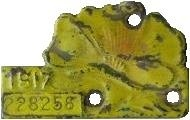
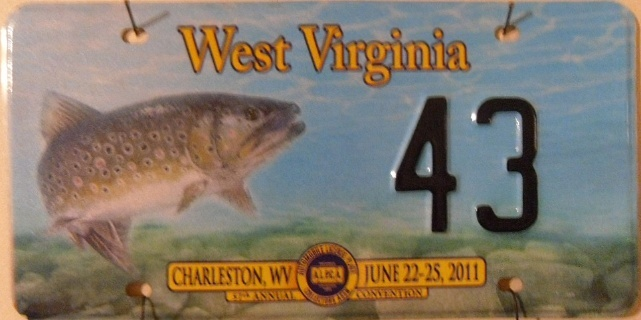
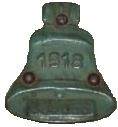
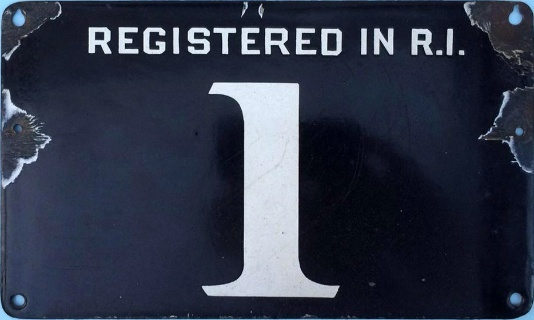
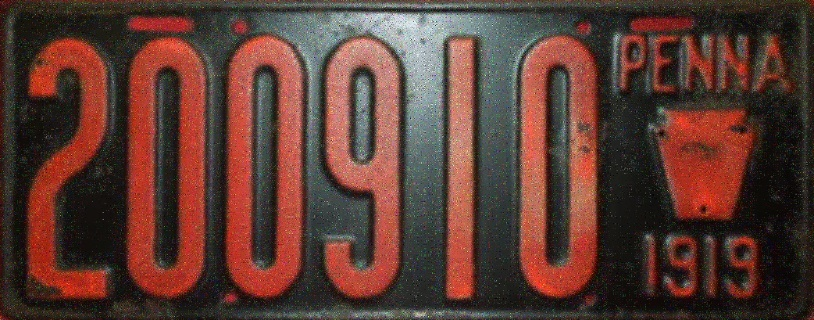
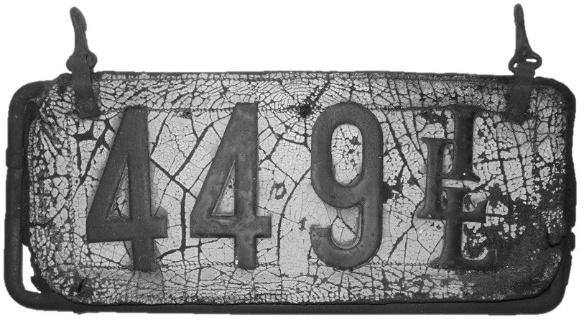
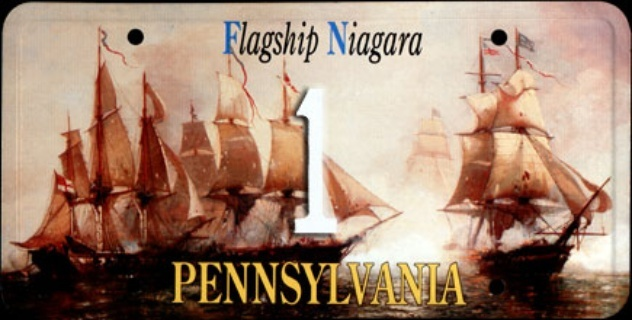
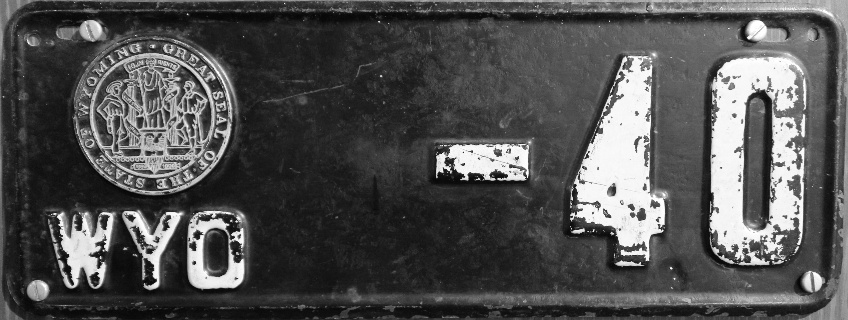
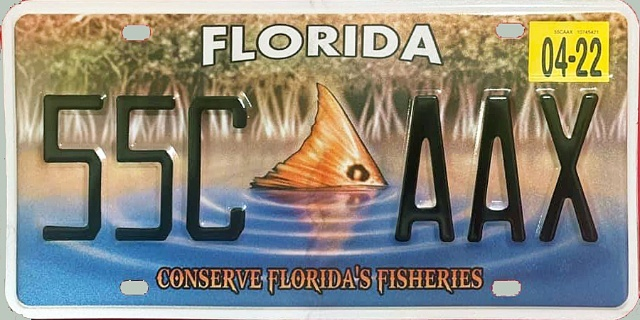
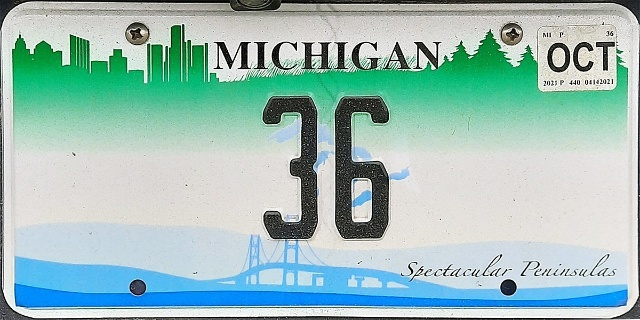
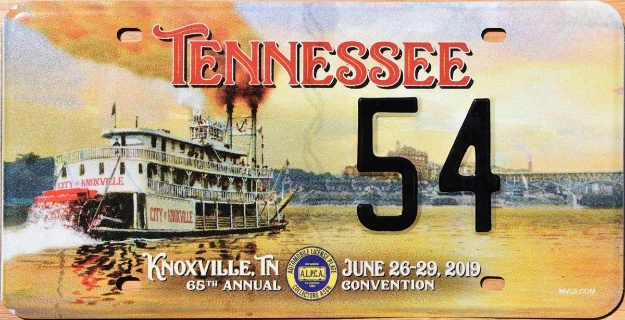
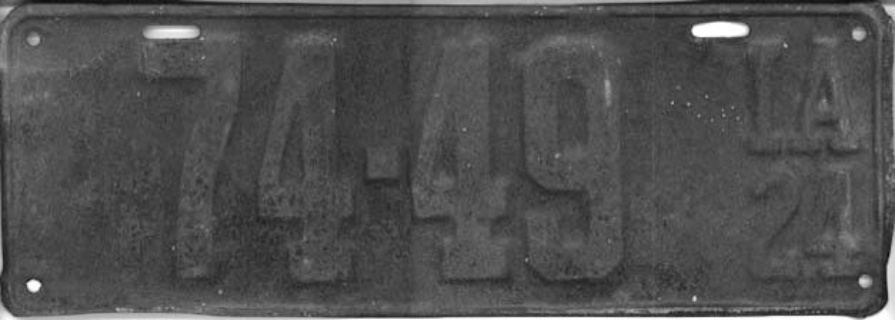
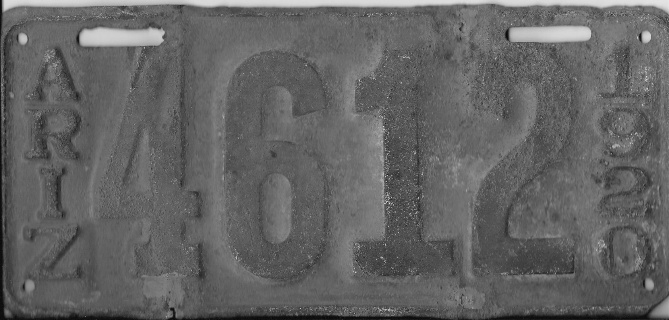
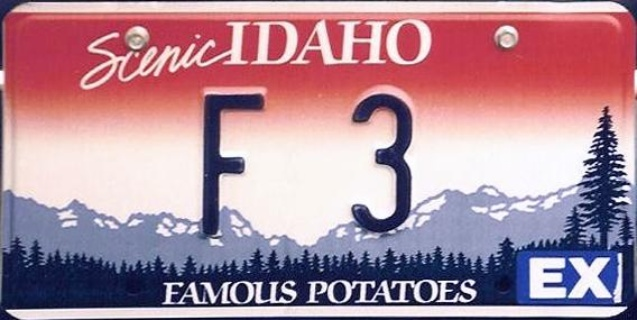
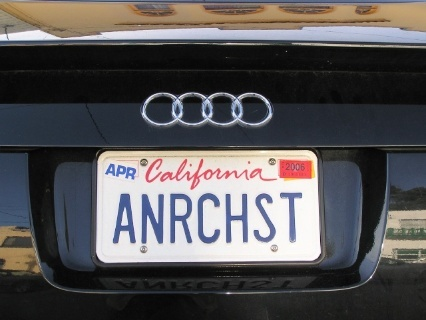
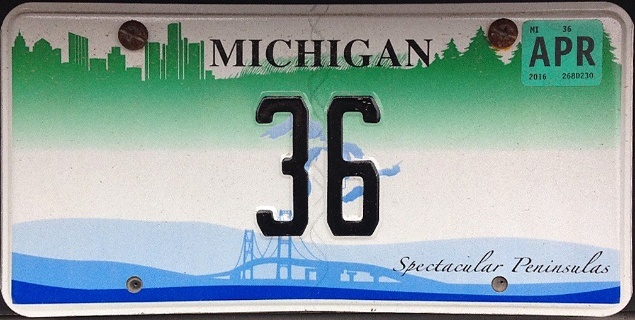
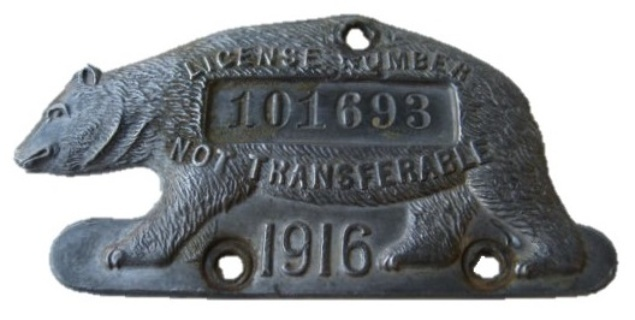
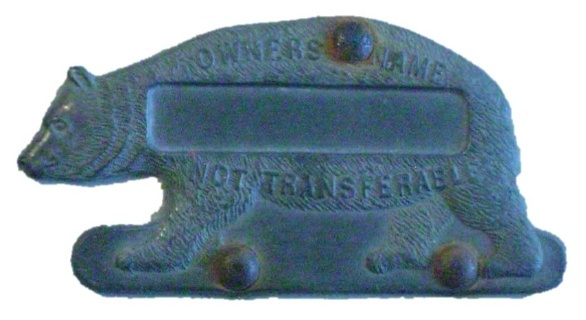

0

In [9]:
fd.vis.outliers_gallery()

## Discover patterns using Renumics Spotlight
fastdup's report already gives us a good first overview on severe outliers in the data. If you want to find out if there are systematic **outlier patterns**, which are possibly related to specific classes, you can use Renumics Spotlight for an **interactive analysis** of fastdup's detection results.

In [10]:
outlier_df = fd.outliers()
outlier_df["embedding"] = embeddings[outlier_df["outlier"]].tolist()

In [11]:
spotlight.show(outlier_df, dtype={"embedding": spotlight.Embedding, "filename_outlier": spotlight.Image, "filename_nearest": spotlight.Image}, layout="spotlight-layout-outlier.json")

**Result**:
![Spotlight Outlier View](img/outliers_spotlight.png)

Spotlight will give you additional possibilities to interactively explore the outliers detected by fastdup and answer questions such as:
1. How are the outliers **distributed** across classes
2. Where are **clusters** of outliers that share similar properties
3. Are outliers fastdup detects in the image data **explainable via metadata** you might have
4. ...

# Check the data for duplicates

## Detect issues fast using fastdup

/home/daniel/code/fastdup-spotlight-cleaning/.venv/lib/python3.10/site-packages/fastdup/galleries.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/home/daniel/code/fastdup-spotlight-cleaning/.venv/lib/python3.10/site-packages/fastdup/galleries.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
100%|█████████████████████████████████████████████

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



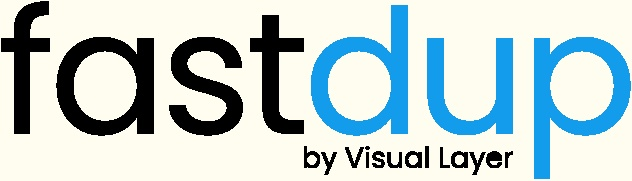
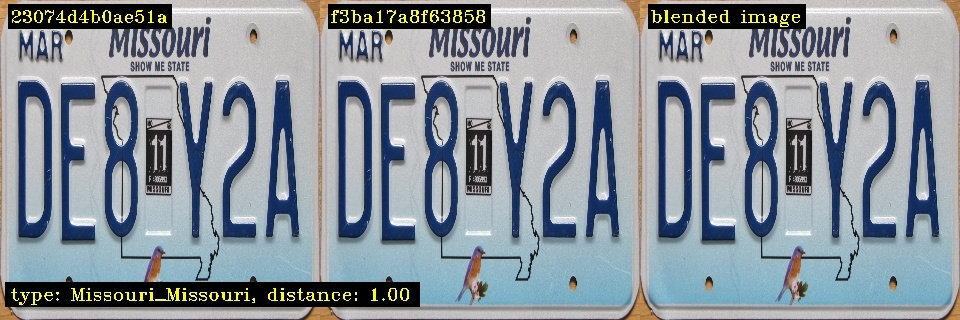
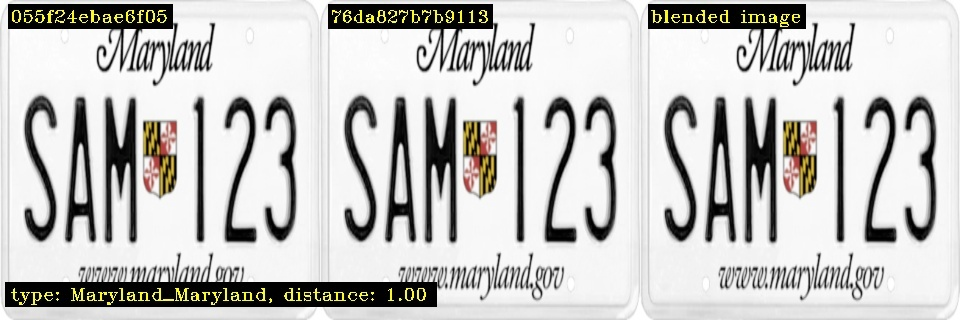
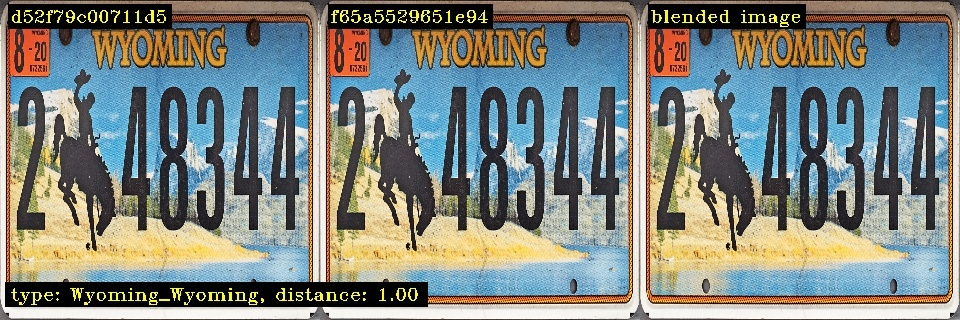
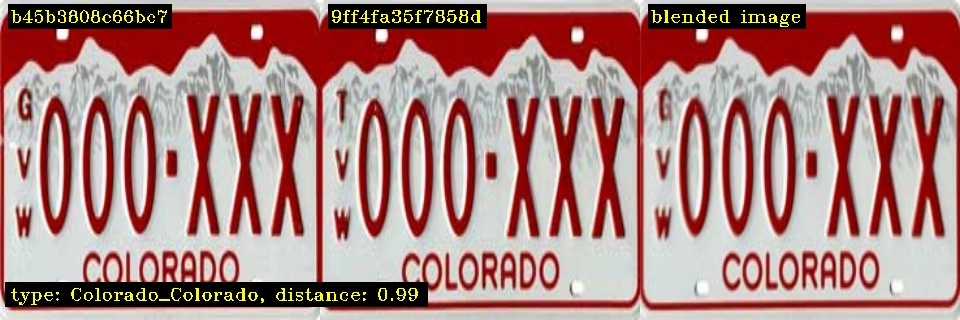
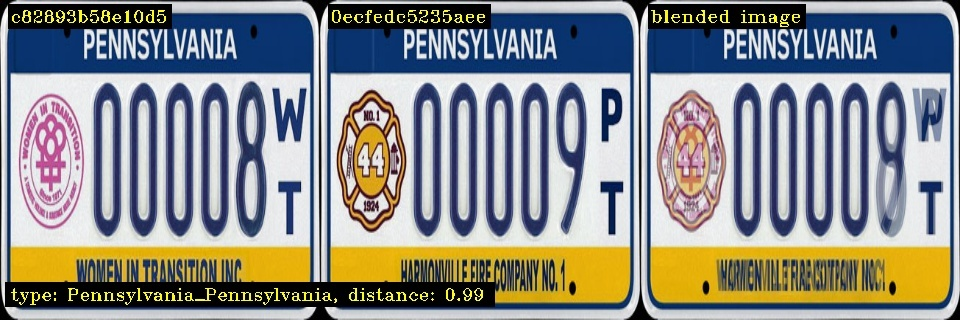
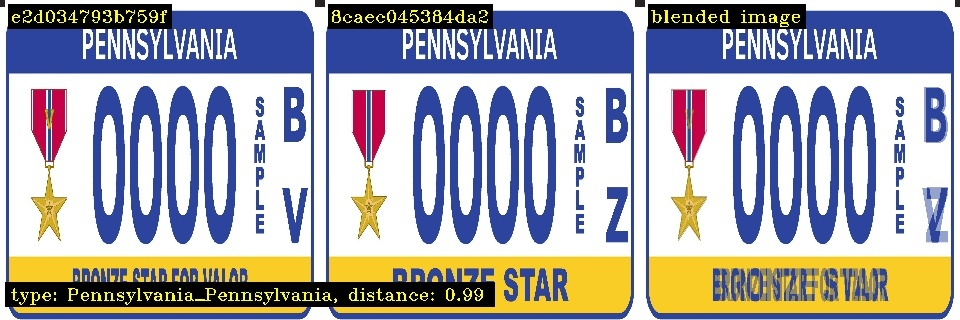
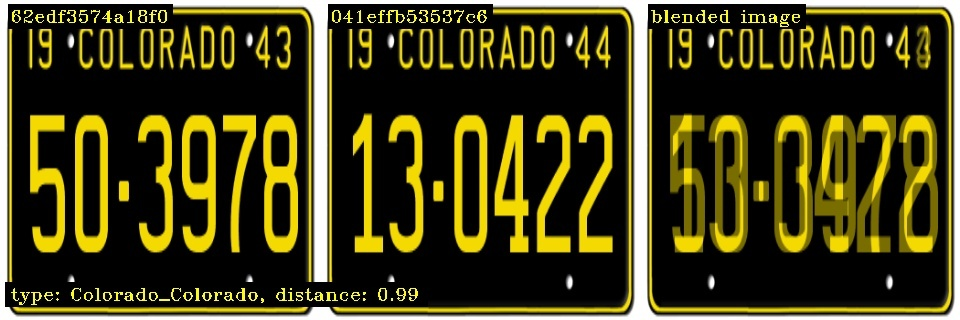
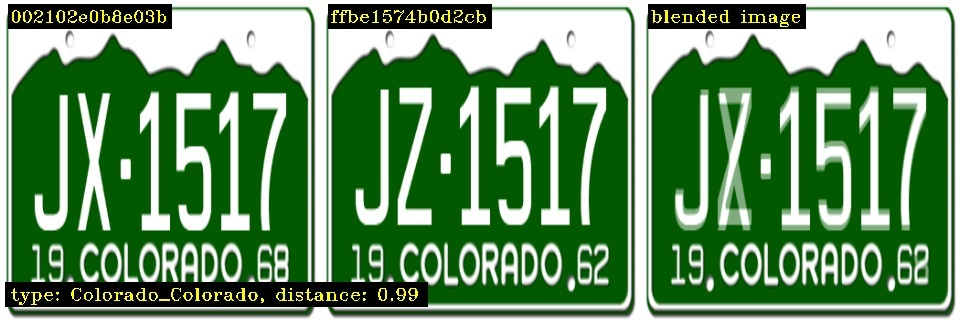
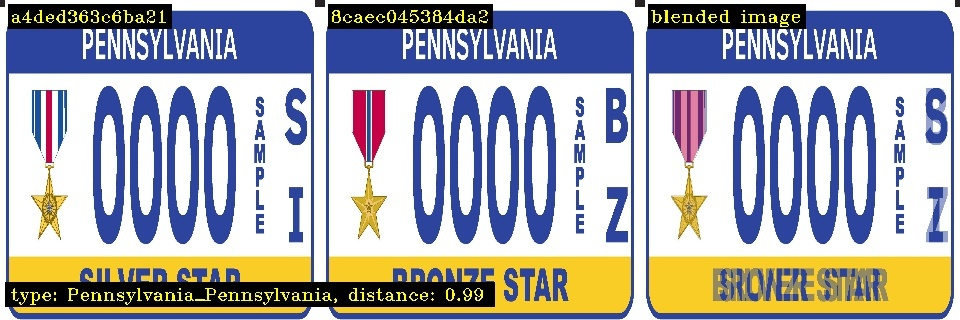
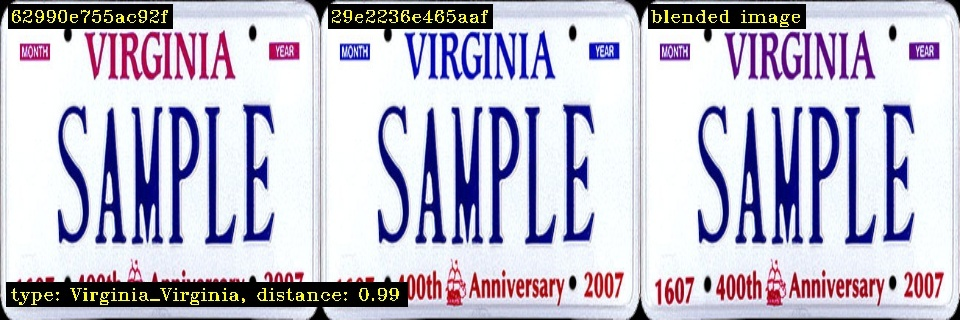

0

In [6]:
fd.vis.duplicates_gallery()

## Discover patterns using Renumics Spotlight

In [7]:
similarity_df = fd.similarity()

# Adjust the thresholds to include more dissimilar images in the issues list
exact_dup_threshold = 0.998
near_dup_threshold = 0.98

df["duplicate"] = "no"
df.loc[similarity_df["distance"] >= exact_dup_threshold, "duplicate"] = "exact"
df.loc[(similarity_df["distance"] >= near_dup_threshold) & (similarity_df["distance"] < exact_dup_threshold), "duplicate"] = "near"

duplicate_issues = []
for _, row in similarity_df[similarity_df["distance"] >= near_dup_threshold].iterrows():
        duplicate_issue = DataIssue(
                            title=f"{'Exact' if row['distance'] >= exact_dup_threshold else 'Near'} Duplicate | Distance {row['distance']:.2f}",
                            description=f"Labels from/to: {row['label_from']}/{row['label_to']}",
                            rows=[row["from"], row["to"]],
                            columns=["embedding"]
                        )
        duplicate_issues.append(duplicate_issue)
       

df["embedding"] = embeddings.tolist()

In [8]:
spotlight.show(df, dtype={"embedding": spotlight.Embedding, "filename": spotlight.Image}, issues=duplicate_issues, layout="spotlight-layout-duplicates.json")

**Results:**
![Spotlight Results](img/duplicates_spotlight.png)

Spotlight will give you the possibility to explore fastdup's detection results interactively. You can investigate questions such as:
1. Are there **data slices** containing a large numbers of duplicates?
2. Can you manually identify larger **clusters of near duplicates**?
3. Are certain **metadata** attributes explanatory for certain types of duplicates?

# Check the data for label inconsistencies

## Detect issues fast using fastdup

100%|██████████████████████████████████████████| 20/20 [00:03<00:00,  6.57it/s]

Stored similar images visual view in  work_dir/galleries/similarity.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



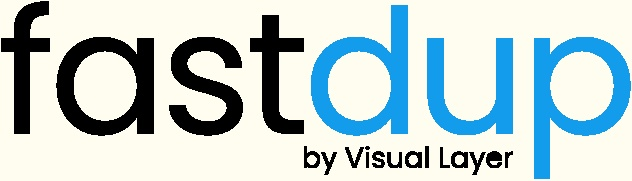
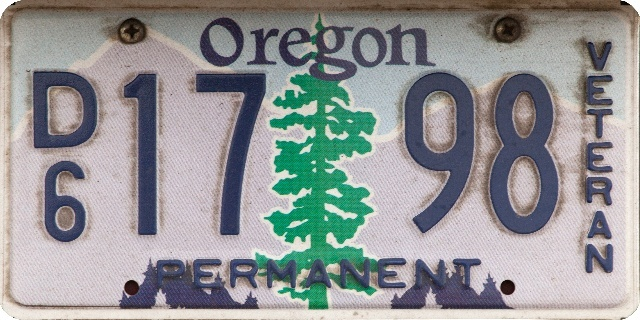
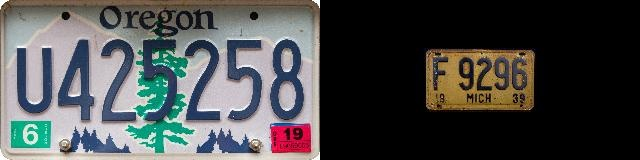
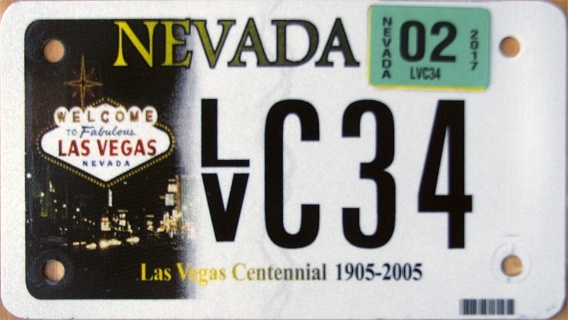
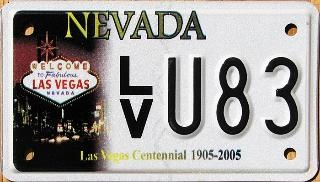
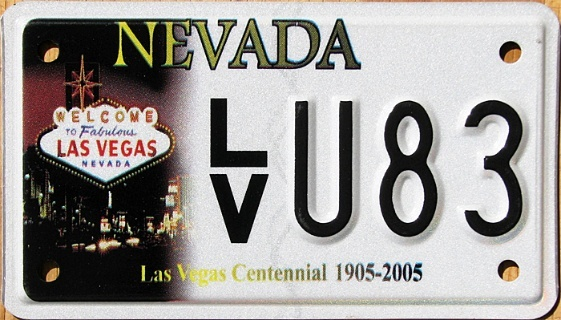
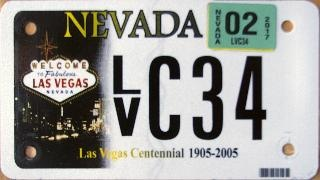
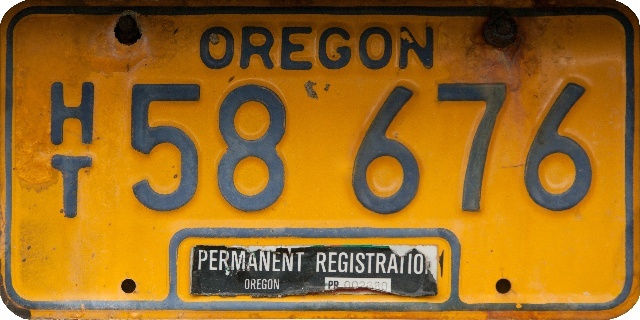
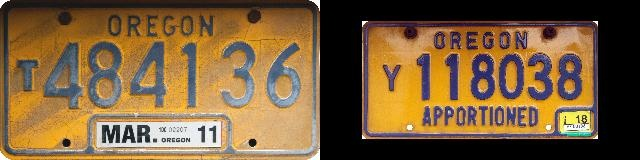
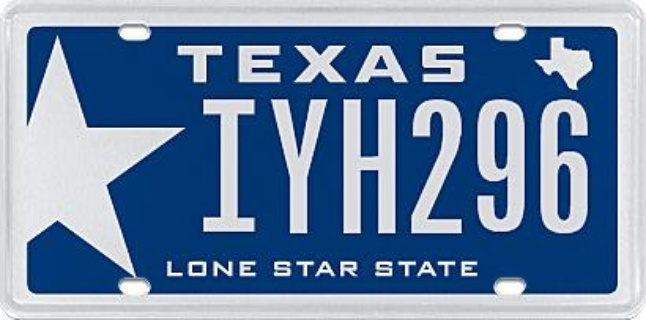
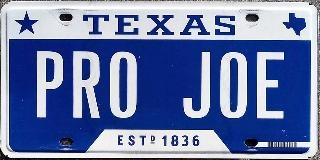
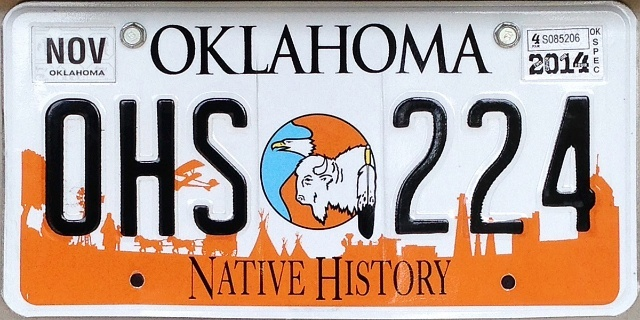
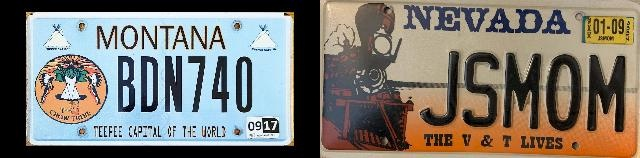
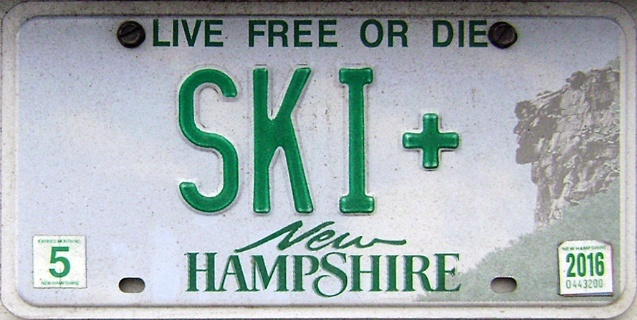
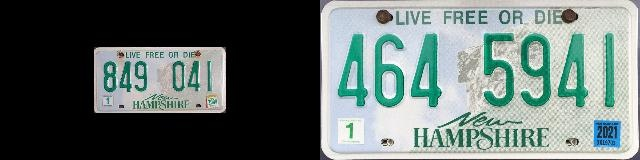
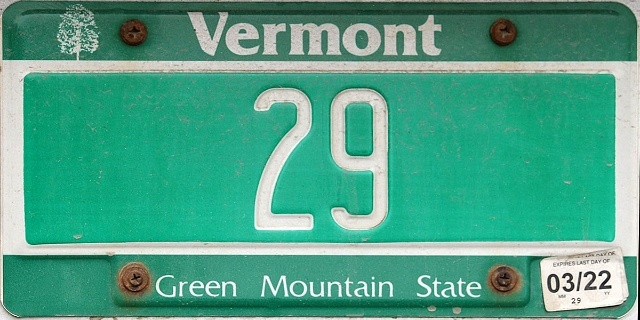
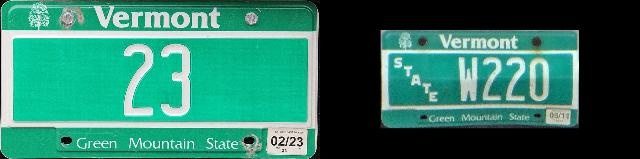
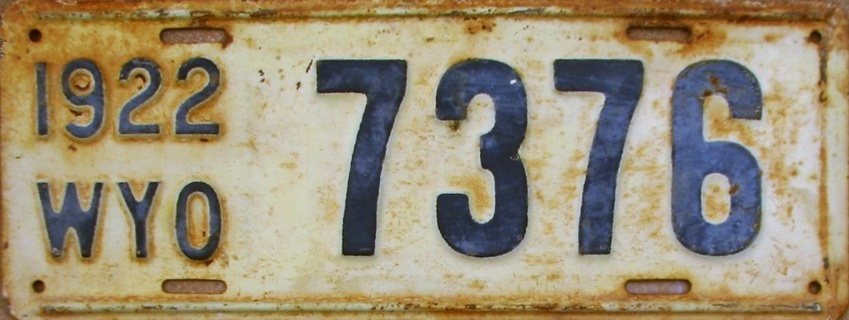
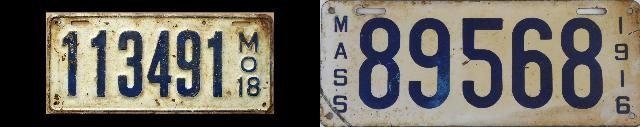
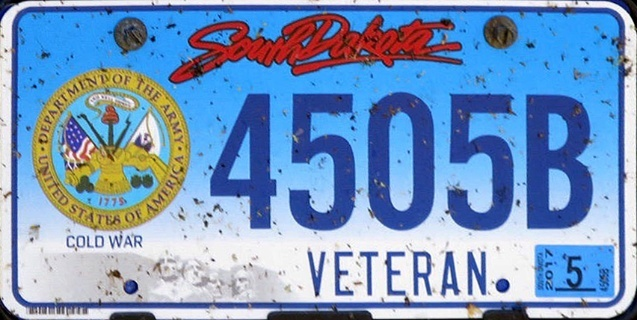
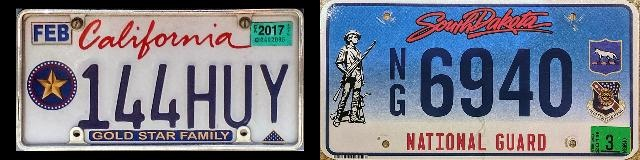
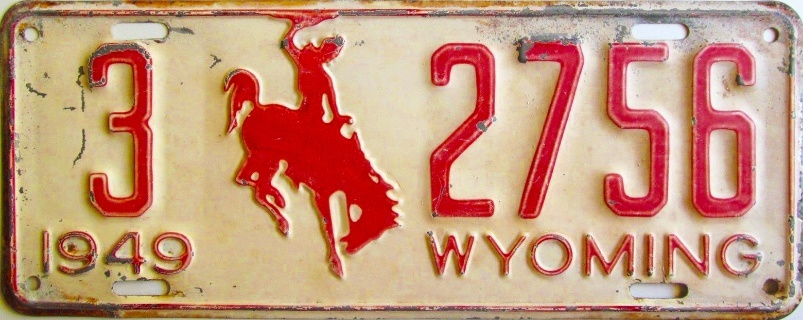
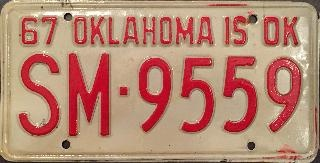
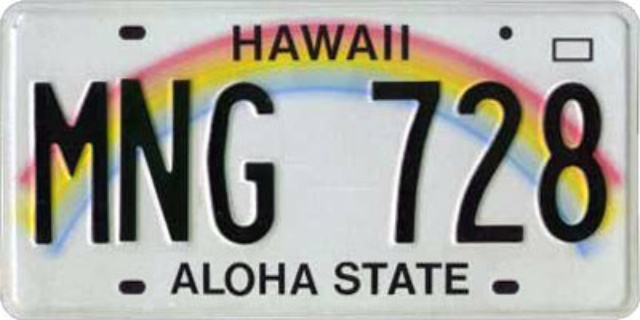
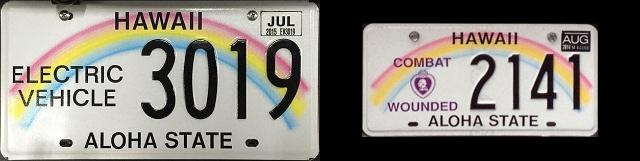
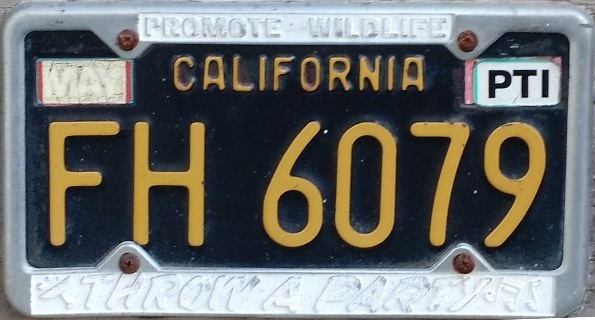
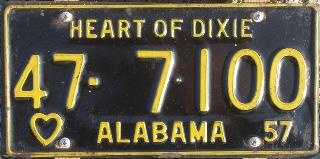
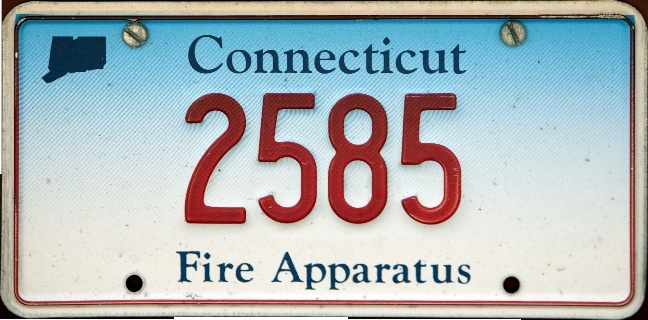
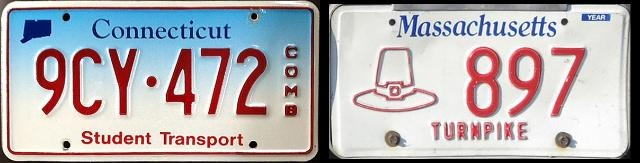
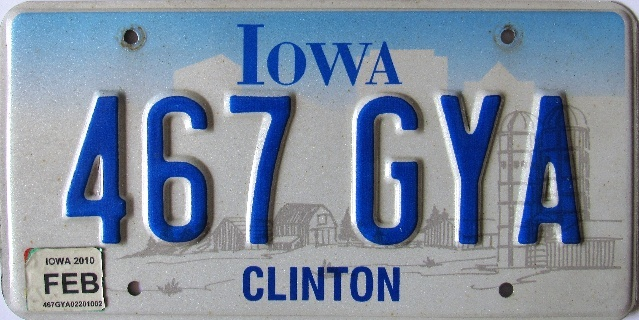
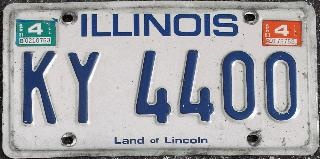
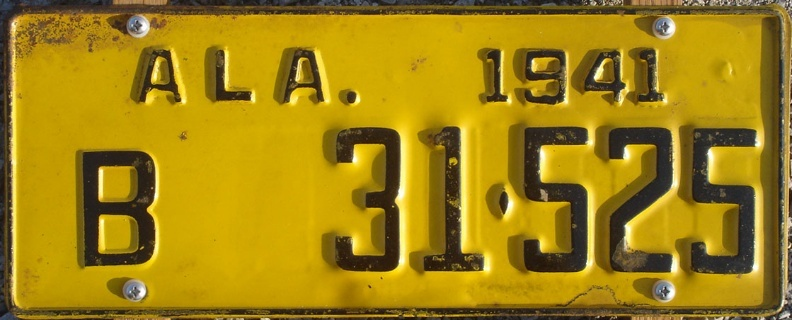
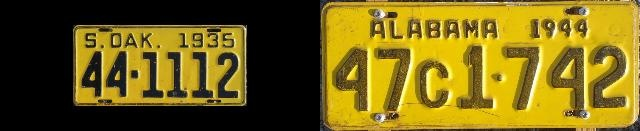
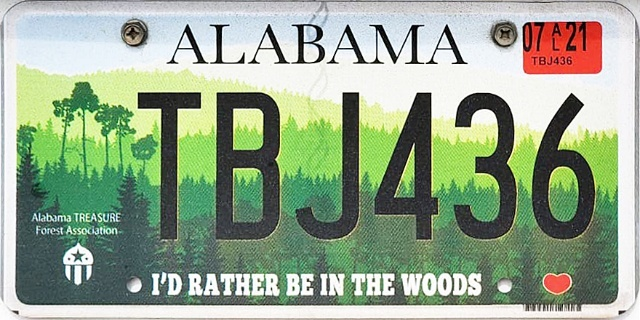
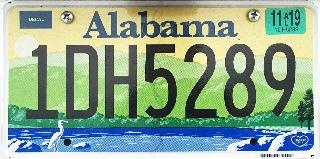
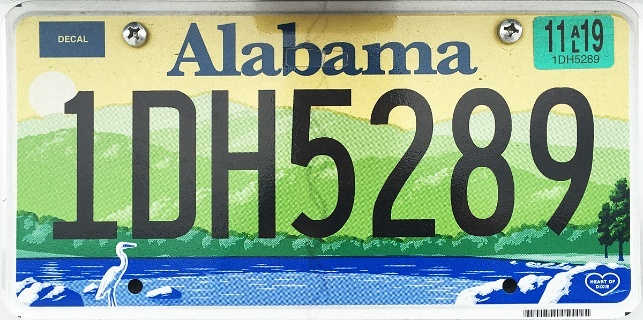
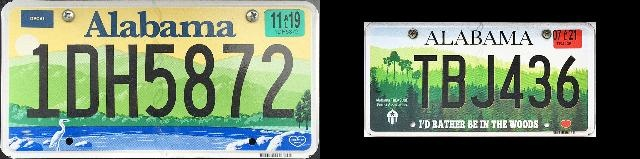
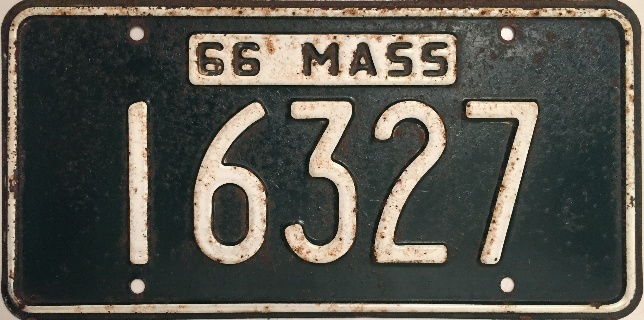
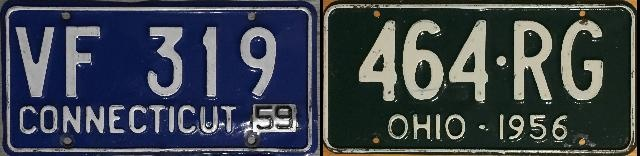
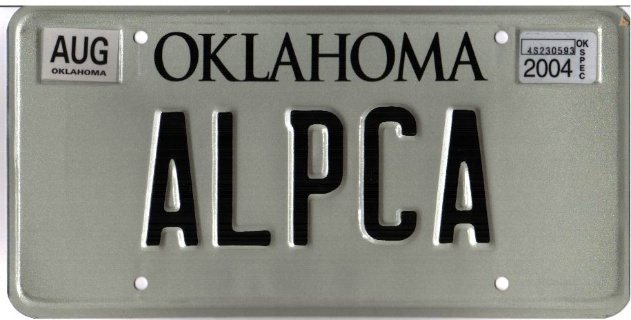
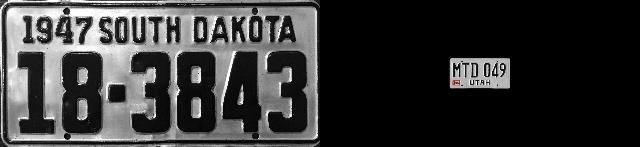

In [16]:
similarities_df = fd.vis.similarity_gallery() 

## Discover patterns using Renumics Spotlight

In [22]:
similarity_df = fd.similarity()
_, embeddings = fd.embeddings()
similarity_df["embedding"] = embeddings[similarity_df["from"]].tolist()

Read a total of  4463 images


In [26]:
spotlight.show(similarity_df, dtype={"embedding": spotlight.Embedding})

# Check the data for common issues like low contrast or blur

# Identify clusters to gain additional insights for training and evaluation